# Predicting the Price of Used Honda Dio Motor Bike in Sri Lanka

In this Project, we are going to predict the Price of Sri Lankan Used Honda Dio Bike using various features like Brand, Price, Mileage, Year etc. The data is obtained using web scraping reputed vehecle reselling site called Riyasewana.

**To be able to predict used Honda Dio Bike market value can help both buyers and sellers.**

There are lots of individuals who are interested in Used Honda Dio used Motor Bike market at some points in their life because they wanted to sell their motor bike or buy a used motor bike. In this process, it’s a big corner to pay too much or sell less then it’s market value.

# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Loading the raw data

In [4]:
dio=pd.read_excel("Dio.xlsx")
dio.head()

,Title,Link,Location,Price,Mileage,Date
0,Honda Dio 2017 Motorbike,https://riyasewana.com/buy/honda-dio-sale-band...,Bandaragama,"Rs. 500,000",39000,2024-01-26
1,Honda Dio 2018 Motorbike,https://riyasewana.com/buy/honda-dio-sale-gamp...,Gampaha,"Rs. 578,000",30000,2024-01-26
2,Honda DIO 2017 Motorbike,https://riyasewana.com/buy/honda-dio-sale-mata...,Matara,"Rs. 565,000",15250,2024-01-26
3,Honda Dio 2018 Motorbike,https://riyasewana.com/buy/honda-dio-sale-anur...,Anuradapura,"Rs. 535,000",44444,2024-01-26
4,Honda DIO 2017 Motorbike,https://riyasewana.com/buy/honda-dio-sale-kalu...,Kalutara,"Rs. 12,865,588",4628,2024-01-26


### Drop unwanted column

In [5]:
dio.drop("Link",axis=1,inplace=True)

### Number of rows and columns in data frame

In [6]:
dio.shape

(1907, 5)

### Check the count of duplicated rows

In [7]:
dio.duplicated().sum()

25

### Deleting duplicated rows and check the task completed successfully

In [8]:
dio.drop_duplicates(inplace=True)
dio.duplicated().sum()

0

### Check missing values included rows in data frame

In [9]:
dio.isnull().sum()

Title       0
Location    0
Price       0
Mileage     0
Date        0
dtype: int64

### Get Summarized Information of the data frame

In [10]:
dio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1882 entries, 0 to 1906
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     1882 non-null   object
 1   Location  1882 non-null   object
 2   Price     1882 non-null   object
 3   Mileage   1882 non-null   int64 
 4   Date      1882 non-null   object
dtypes: int64(1), object(4)
memory usage: 88.2+ KB


### Get Only Published Year from Date and store it as Published_Year

In [11]:
dio["Published_Year"]=pd.to_datetime(dio["Date"]).dt.year

### Get Model, Brand and Year of manufatured from Title

In [12]:
dio["Model"]=dio["Title"].str.split().str[0]
dio["Brand"]=dio["Title"].str.split().str[1]
dio["Year"]=dio["Title"].str.split().str[2]

dio.drop(["Title","Date"],axis=1,inplace=True)  # drop Title and Date column permanatly

### Get Number of unique value of every variables

In [13]:
dio.nunique()

Location           86
Price             197
Mileage           727
Published_Year      2
Model               1
Brand               6
Year               35
dtype: int64

### Get the data types of every varible

In [14]:
dio.dtypes

Location          object
Price             object
Mileage            int64
Published_Year     int64
Model             object
Brand             object
Year              object
dtype: object

### Get First 5 rows of  the data frame

In [15]:
dio.head()

,Location,Price,Mileage,Published_Year,Model,Brand,Year
0,Bandaragama,"Rs. 500,000",39000,2024,Honda,Dio,2017
1,Gampaha,"Rs. 578,000",30000,2024,Honda,Dio,2018
2,Matara,"Rs. 565,000",15250,2024,Honda,DIO,2017
3,Anuradapura,"Rs. 535,000",44444,2024,Honda,Dio,2018
4,Kalutara,"Rs. 12,865,588",4628,2024,Honda,DIO,2017


### Get Unique values of Year variable

In [16]:
dio["Year"].unique()

array(['2017', '2018', '2019', '2015', '2022', '2016', 'DX', '2014',
       '2012', '2020', 'Dx', '4', '2013', '2011', '48cc', 'SCV', '2023',
       'BS', 'Japan', '48', 'Scv', '2010', '110', 'Scooter', '2021',
       '2005', '2009', 'Today', '2008', 'ZX', '48cv', 'Zx', 'DIO',
       'SCV110', '8CV110'], dtype=object)

### Remove unnessasary value of Year variable

In [17]:
dio1=dio[~dio["Year"].isin(["DX",'Dx','4','48cc', 'SCV','BS', 'Japan', '48', 'Scv','Scooter','Today','ZX', '48cv', 'Zx', 'DIO',
       'SCV110', '8CV110'])]

### Convert Price into intiger format and convert it as Lacs

In [18]:
dio1['Price'] = dio1['Price'].str.replace('[^\d]', '', regex=True)
# Convert the column to numeric type
dio1['Price'] = pd.to_numeric(dio1['Price'])
dio1['Price'] = dio1['Price']/1e5
dio1.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_3588\2656067486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dio1['Price'] = dio1['Price'].str.replace('[^\d]', '', regex=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_3588\2656067486.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dio1['Price'] = pd.to_numeric(dio1['Price'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_3588\2656067486.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,Location,Price,Mileage,Published_Year,Model,Brand,Year
0,Bandaragama,5.00000,39000,2024,Honda,Dio,2017
1,Gampaha,5.78000,30000,2024,Honda,Dio,2018
2,Matara,5.65000,15250,2024,Honda,DIO,2017
3,Anuradapura,5.35000,44444,2024,Honda,Dio,2018
4,Kalutara,128.65588,4628,2024,Honda,DIO,2017


### Checking Price data type converted was successfully

In [19]:
dio1["Price"].dtype

dtype('float64')

In [20]:
dio1.nunique()

Location           85
Price             194
Mileage           691
Published_Year      2
Model               1
Brand               5
Year               18
dtype: int64

### Converting Year data types as Integer

In [21]:
dio1.shape
dio1["Year"]=dio1["Year"].astype(int)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3588\1263034289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dio1["Year"]=dio1["Year"].astype(int)


### Checking Brand Unique values 

In [22]:
dio1["Brand"].unique()
dio1["Brand"].replace({'DIO': 'Dio', 'DIo': 'Dio', 'Dio48cc': 'Dio', 'DiO': 'Dio'}, inplace=True)
dio1["Brand"].nunique()

C:\Users\Admin\AppData\Local\Temp\ipykernel_3588\1500322292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dio1["Brand"].replace({'DIO': 'Dio', 'DIo': 'Dio', 'Dio48cc': 'Dio', 'DiO': 'Dio'}, inplace=True)


1

### Checking Location Unique values 

In [23]:
dio1["Location"].unique()

array(['Bandaragama', 'Gampaha', 'Matara', 'Anuradapura', 'Kalutara',
       'Nawalapitiya', 'Kurunegala', 'Galle', 'Colombo', 'Kandy',
       'Wennappuwa', 'Kadawatha', 'Negombo', 'Matale', 'Ratnapura',
       'Kuliyapitiya', 'Mirigama', 'Polonnaruwa',
       'Dehiwala-Mount-Lavinia', 'Panadura', 'Matugama', 'Katunayake',
       'Chilaw', 'Embilipitiya', 'Mannar', 'Puttalam', 'Bandarawela',
       'Polgahawela', 'Badulla', 'Dompe', 'Piliyandala', 'Malabe',
       'Boralesgamuwa', 'Kegalle', 'Kaduwela', 'Kalawana', 'Mawanella',
       'Minuwangoda', 'Nittambuwa', 'Hambantota', 'Weligama', 'Elpitiya',
       'Ambalangoda', 'Tangalle', 'Divulapitiya', 'Gampola', 'Padukka',
       'Kottawa', 'Battaramulla', 'Kelaniya', 'Moneragala', 'Horana',
       'Ja-Ela', 'Wattala', 'Welimada', 'Mahiyanganaya', 'Moratuwa',
       'Ragama', 'Marawila', 'Kandana', 'Maharagama', 'Kalmunai',
       'Beruwala', 'Nugegoda', 'Homagama', 'Trincomalee', 'Balangoda',
       'Kotte', 'Ampara', 'Dambulla', 'Aviss

In [24]:
dio1.head()

,Location,Price,Mileage,Published_Year,Model,Brand,Year
0,Bandaragama,5.00000,39000,2024,Honda,Dio,2017
1,Gampaha,5.78000,30000,2024,Honda,Dio,2018
2,Matara,5.65000,15250,2024,Honda,Dio,2017
3,Anuradapura,5.35000,44444,2024,Honda,Dio,2018
4,Kalutara,128.65588,4628,2024,Honda,Dio,2017


In [25]:
dio1.nunique()

Location           85
Price             194
Mileage           691
Published_Year      2
Model               1
Brand               1
Year               18
dtype: int64

### Get the Unique Values in Year

In [26]:
dio1["Year"].unique()

array([2017, 2018, 2019, 2015, 2022, 2016, 2014, 2012, 2020, 2013, 2011,
       2023, 2010,  110, 2021, 2005, 2009, 2008])

### Remove 110 form Year Variable

In [27]:
dio1 = dio1[~dio1["Year"].isin([110])]

### Get statistical summrized details of dataframe (dio1)

In [28]:
dio1.describe()

,Price,Mileage,Published_Year,Year
count,1105.000000,1.775000e+03,1775.000000,1775.000000
mean,11.986620,1.856061e+06,2023.394930,2016.853521
std,236.048311,5.764267e+06,0.488973,2.160932
min,1.100000,1.000000e+00,2023.000000,2005.000000
25%,4.100000,2.500000e+04,2023.000000,2016.000000
50%,4.650000,3.300000e+04,2023.000000,2017.000000
75%,5.350000,4.600000e+04,2024.000000,2018.000000
max,7850.028690,2.024013e+07,2024.000000,2023.000000


# Price

### Remove more than 7 lacs data ; Bracuse in market it can't be happend

In [29]:
dio2=dio1[dio1["Price"]<7]

### Get Distribution plot of Price 

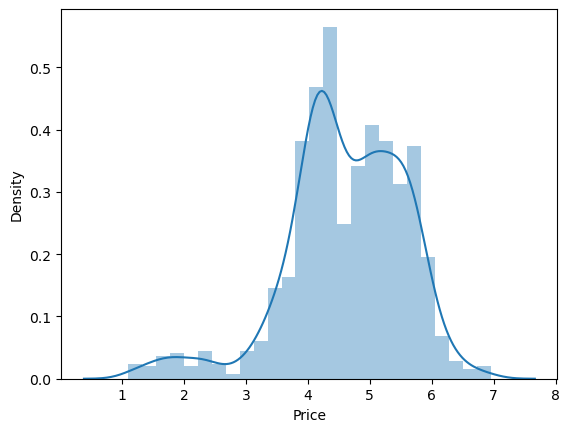

In [30]:
sns.distplot(dio2["Price"])
plt.show()

### Get Barplot identify outliers of Price

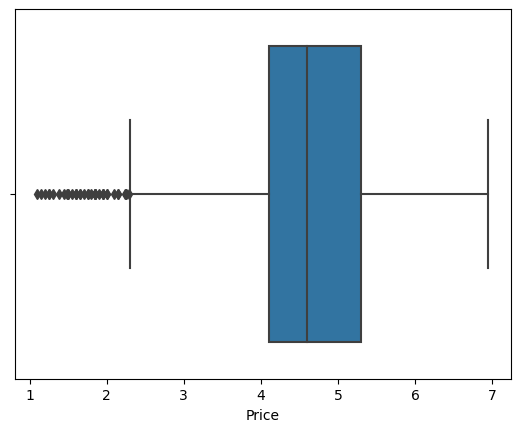

In [31]:
sns.boxplot(dio2["Price"])
plt.show()

In [32]:
Q1 = dio2['Price'].quantile(0.25)
Q3 = dio2['Price'].quantile(0.75)
IQR = Q3 - Q1
print("Q1 :-",Q1)
print("Q3 :-",Q3)
print("IQR :-",IQR)

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower Bound is:-",lower_bound)
print("Upper Bound is:-",upper_bound)

Q1 :- 4.1
Q3 :- 5.3
IQR :- 1.2000000000000002
Lower Bound is:- 2.2999999999999994
Upper Bound is:- 7.1


### Getting Average price of every Year

In [33]:
price_year=dio2.groupby(["Year"])["Price"].mean()
price_year

Year
2005    1.250000
2008    1.625000
2009    1.325000
2010    1.793333
2011    2.087227
2012    2.822000
2013    3.453611
2014    3.809848
2015    4.061423
2016    4.249153
2017    4.667817
2018    5.255917
2019    5.681293
2020    5.970294
2023    5.900000
Name: Price, dtype: float64

### Getting Boxplot Year vs Price :- To identify outliers

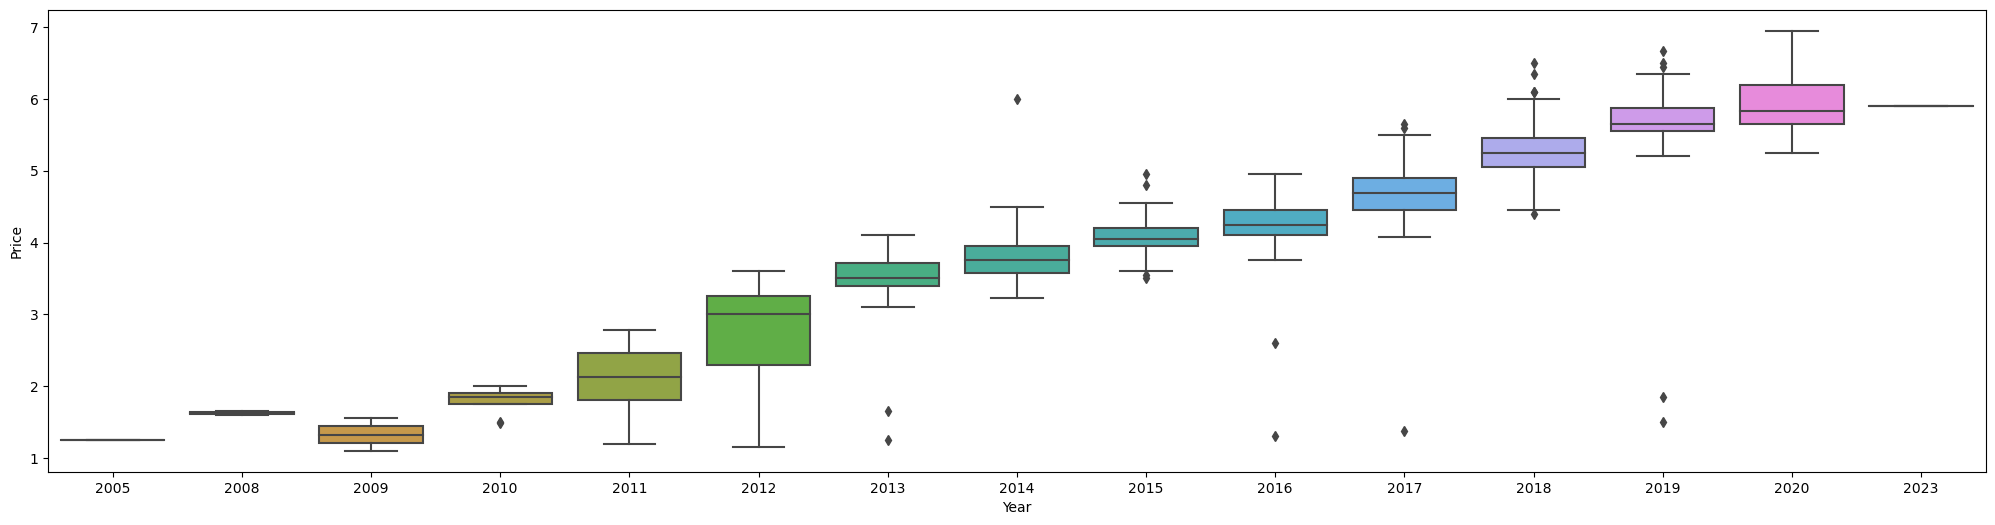

In [34]:
plt.figure(figsize=(25,6))
sns.boxplot(x="Year",y="Price",data=dio2)
plt.show()

### Here year 2005 and 2008 data has very low count rather than others

In [35]:
dio2=dio2[~dio2["Year"].isin([2005,2008])]

### Removing outliers 

In [36]:
dio2 = dio2[
    ~((dio2["Year"] == 2013) & (dio2["Price"] < 2.5)) &
    ~((dio2["Year"] == 2014) & (dio2["Price"] > 5)) &
    ~((dio2["Year"] == 2016) & (dio2["Price"] < 3)) &
    ~((dio2["Year"] == 2017) & (dio2["Price"] < 3)) &
    ~((dio2["Year"] == 2012) & (dio2["Price"] < 2)) &
    ~((dio2["Year"] == 2019) & (dio2["Price"] < 3))
]


In [37]:
dio2.head()

,Location,Price,Mileage,Published_Year,Model,Brand,Year
0,Bandaragama,5.00,39000,2024,Honda,Dio,2017
1,Gampaha,5.78,30000,2024,Honda,Dio,2018
2,Matara,5.65,15250,2024,Honda,Dio,2017
3,Anuradapura,5.35,44444,2024,Honda,Dio,2018
5,Matara,5.92,34000,2024,Honda,Dio,2019


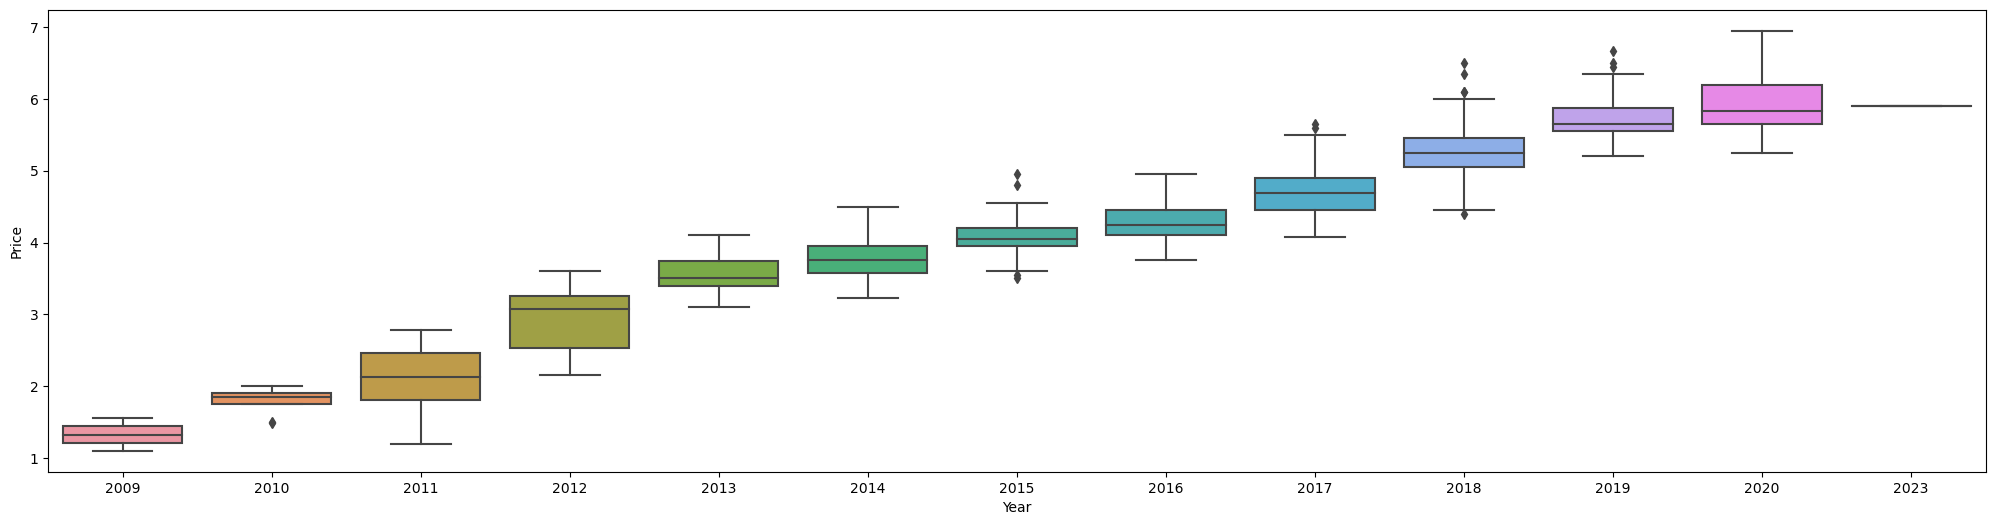

In [38]:
plt.figure(figsize=(25,6))
sns.boxplot(x="Year",y="Price",data=dio2)
plt.show()

In [39]:
dio2[dio2["Price"]<2]

,Location,Price,Mileage,Published_Year,Model,Brand,Year
121,Kegalle,1.85,37000,2024,Honda,Dio,2011
319,Matara,1.85,85000,2024,Honda,Dio,2010
405,Balangoda,1.45,52,2024,Honda,Dio,2011
465,Chilaw,1.85,56836,2024,Honda,Dio,2010
507,Kuliyapitiya,1.75,88888,2024,Honda,Dio,2010
513,Balangoda,1.50,56,2024,Honda,Dio,2010
557,Nittambuwa,1.85,20240113,2024,Honda,Dio,2010
561,Matara,1.95,20240112,2024,Honda,Dio,2010
752,Ambalangoda,1.49,41000,2024,Honda,Dio,2010
756,Minuwangoda,1.10,20231231,2023,Honda,Dio,2009


# Mileage

### Normally Sccoty milage are below 1e5 in selling market

In [40]:
dio3=dio2[dio2["Mileage"]<1e5]

In [41]:
dio3.describe()

,Price,Mileage,Published_Year,Year
count,952.000000,952.000000,952.000000,952.000000
mean,4.679165,34668.070378,2023.414916,2016.644958
std,0.889224,14632.005215,0.492967,2.065692
min,1.200000,1.000000,2023.000000,2009.000000
25%,4.100000,25000.000000,2023.000000,2015.000000
50%,4.700000,34000.000000,2023.000000,2017.000000
75%,5.350000,43000.000000,2024.000000,2018.000000
max,6.950000,99999.000000,2024.000000,2023.000000


<AxesSubplot:xlabel='Mileage'>

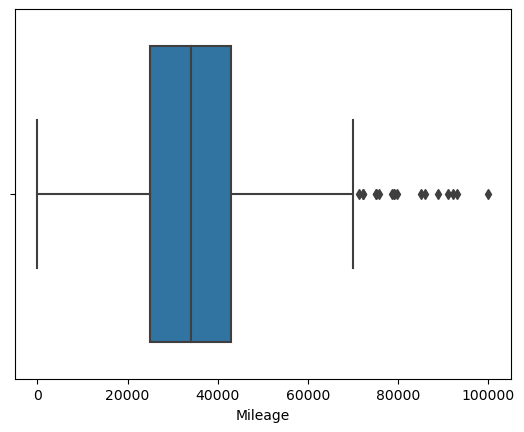

In [42]:
sns.boxplot(dio3["Mileage"])

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

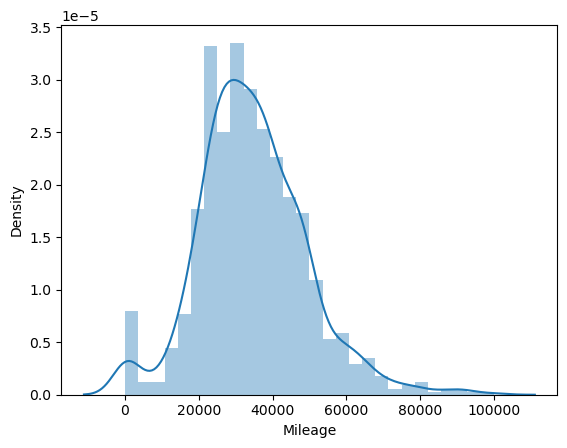

In [43]:
sns.distplot(dio3["Mileage"])

In [44]:
corr=dio3.corr()

<AxesSubplot:>

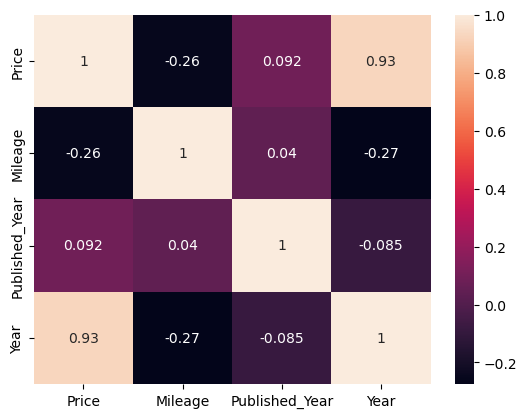

In [45]:
sns.heatmap(dio3.corr(),annot=True)

In [46]:
dio3.describe(include="object")

,Location,Model,Brand
count,952,952,952
unique,82,1,1
top,Gampaha,Honda,Dio
freq,190,952,952


In [47]:
y = dio3['Price']
X = dio3[["Mileage","Published_Year","Year"]]

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=91)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (761, 3)
x test:  (191, 3)
y train:  (761,)
y test:  (191,)


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
# Initialize and train your linear regression model

model = LinearRegression()
model.fit(X_train, y_train)
    
    # Make predictions
y_pred = model.predict(X_test)
    
    # Calculate R-squared
r2 = r2_score(y_test, y_pred)
    


print("R-squared:", r2)

R-squared: 0.8874913735909259


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Assuming X and y are your features and target variable

best_r2 = -1  # Initialize the best R-squared score to a value lower than any possible R-squared score
best_random_state = None

for random_state in range(100):  # You can adjust the range based on your preferences
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    
    if r2 > best_r2:
        best_r2 = r2
        best_random_state = random_state

# Train the model with the best random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=best_random_state)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print("Best Random State:", best_random_state)
print("Best R-squared:", r2)


Best Random State: 31
Best R-squared: 0.9192032654245459


In [51]:
pickle.dump(model,open("model.pkl","wb"))

In [52]:
model=pickle.load(open("model.pkl","rb"))

In [53]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [54]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

Train R2-score : 0.88
Test R2-score : 0.92
Train CV scores : [0.87742585 0.88993335 0.90667484 0.84779991 0.84731898]
Train CV mean : 0.87


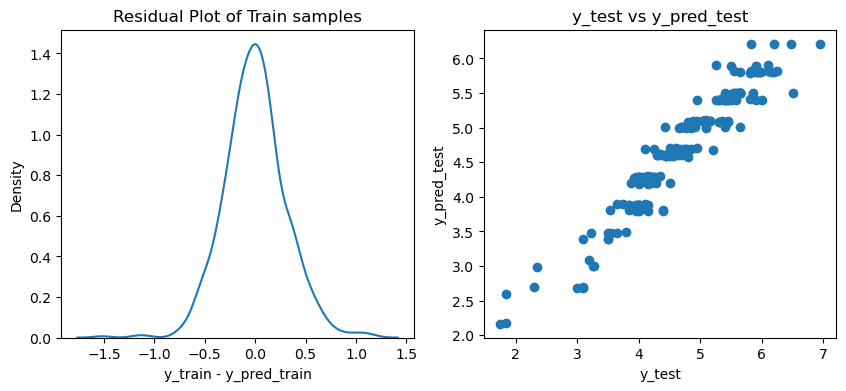

In [55]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

Train R2-score : 0.88
Test R2-score : 0.92
Train CV scores : [0.87704567 0.88938519 0.90633508 0.84829616 0.84768662]
Train CV mean : 0.87


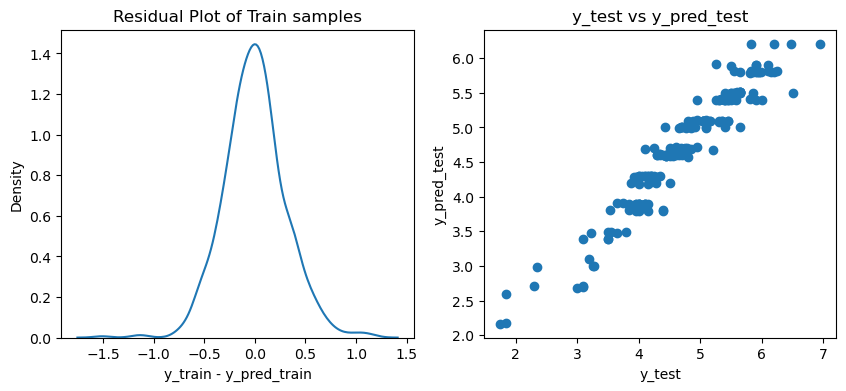

In [56]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

Train R2-score : 0.88
Test R2-score : 0.92
Train CV scores : [0.87729026 0.88923739 0.90546012 0.84827138 0.84770449]
Train CV mean : 0.87


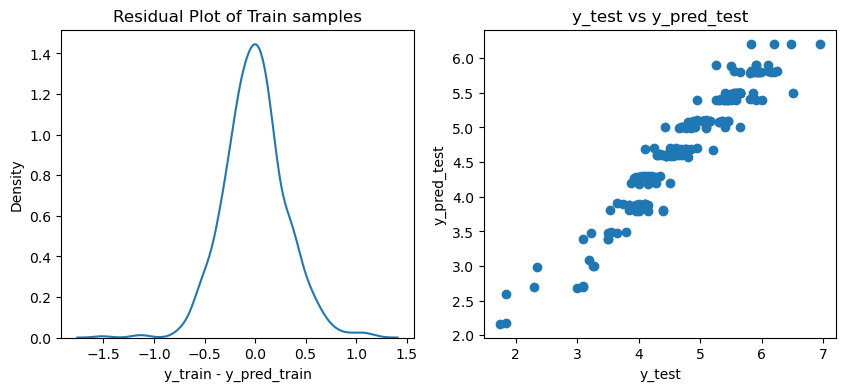

In [57]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))
car_pred_model(ls_rs,"lasso.pkl")